In [2]:
import pandas as pd
import numpy as np
import os
import nibabel as nib
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
df_local_artefacts = pd.read_csv("annotations/local_artefacts.csv")

In [4]:
df_local_artefacts["4"].value_counts()

ringing x,y,z                30
ringing x,z                   4
ringing y,z                   3
erasement z                   3
ringing x,y                   3
kind of arc x,y,z             2
erasement x,y(light),z        2
ringing z                     2
ringing like x,z              2
ringing/erasement x           1
erasement x,z, ringing y      1
erasement x, ringing y        1
Global ringing x,y,z          1
ringing/erasement x,z         1
kind of arc x,z               1
ringing y                     1
ringing x, y, erasement z     1
erasement x                   1
ringing x, erasement y,z      1
Name: 4, dtype: int64

In [13]:
def create_L_sub_ids(df_local_artefacts, val):
    return df_local_artefacts[df_local_artefacts["4"] == val].sub_id.tolist()

L_ringing_xyz = create_L_sub_ids(df_local_artefacts,"ringing x,y,z")
L_global_ringing_xyz = create_L_sub_ids(df_local_artefacts,"Global ringing x,y,z")
L_ringing_xz = create_L_sub_ids(df_local_artefacts,"ringing x,z")
L_ringing_yz = create_L_sub_ids(df_local_artefacts,"ringing y,z")
L_ringing_xy = create_L_sub_ids(df_local_artefacts,"ringing x,y")
L_ringing_y = create_L_sub_ids(df_local_artefacts, "ringing y")
L_ringing_z = create_L_sub_ids(df_local_artefacts,"ringing z")

L_ringing_like_xz = create_L_sub_ids(df_local_artefacts,"ringing like x,z")

L_kind_of_arc_xyz = create_L_sub_ids(df_local_artefacts,"kind of arc x,y,z")
L_kind_of_arc_xz = create_L_sub_ids(df_local_artefacts, "kind of arc x,z")

L_erasement_x = create_L_sub_ids(df_local_artefacts,"erasement x")
L_erasement_z = create_L_sub_ids(df_local_artefacts,"erasement z")

L_erasement_xyz = create_L_sub_ids(df_local_artefacts,"erasement x,y(light),z")

L_erasement_xz_ringing_y = create_L_sub_ids(df_local_artefacts, "erasement x,z, ringing y") 
L_ringing_xy_erasement_z = create_L_sub_ids(df_local_artefacts, "ringing x, y, erasement z")
L_erasement_x_ringing_y = create_L_sub_ids(df_local_artefacts, "erasement x, ringing y")
L_ringing_erasement_x = create_L_sub_ids(df_local_artefacts, "ringing/erasement x")
L_ringing_erasement_xz = create_L_sub_ids(df_local_artefacts, "ringing/erasement x,z")
L_ringing_x_erasement_yz = create_L_sub_ids(df_local_artefacts, "ringing x, erasement y,z")


In [14]:
L_global_ringing_xyz

['KKI-0050788']

In [15]:
# path_test1 = "/media/mleanie/SAMSUNG/QA_study/protopnet_results/testset1/resnet152/19112020/10push0.8167.pth/"
# path_test3 = "/media/mleanie/SAMSUNG/QA_study/protopnet_results/testset3_good_medium/resnet152/19112020/10push0.8167.pth/"

# subids_path_test1 = os.listdir(path_test1)
# subids_path_test3 = os.listdir(path_test3)

subids_path_test1 = pd.read_csv("subids_testset1.csv", header=None)[0].tolist()
subids_path_test3 = pd.read_csv("subids_testset3_good_medium.csv", header=None)[0].tolist()


In [16]:
path_test1 = "results/protopnet/testset1/resnet152/19112020/10push0.8167.pth/"
path_test3 = "results/protopnet/testset3_good_medium/resnet152/19112020/10push0.8167.pth/"

df_group_results_1 = pd.read_csv(os.path.join(path_test1, "group_results.csv"))
df_group_results_3 = pd.read_csv(os.path.join(path_test3, "group_results.csv"))

In [17]:
def analyze_by_local_artefact(df_group_results_1, df_group_results_3, L_sub_ids):
    id1 = [s in L_sub_ids for s in df_group_results_1.subid.tolist()]
    subdf1 = df_group_results_1[id1]
    id3 = [s in L_sub_ids for s in df_group_results_3.subid.tolist()]
    subdf3 = df_group_results_3[id3]
    subdf = pd.concat([subdf1, subdf3], axis=0, ignore_index=True)
    return {"mean_proba": subdf.proba.mean(), 
            "mean_x_proba": subdf.x_proba.mean(), 
            "mean_y_proba": subdf.y_proba.mean(), 
            "mean_z_proba": subdf.z_proba.mean(),
            "median_proba": subdf.proba.median(), 
            "median_x_proba": subdf.x_proba.median(), 
            "median_y_proba": subdf.y_proba.median(), 
            "median_z_proba": subdf.z_proba.median()}

In [18]:
L_sub_ids = L_kind_of_arc_xz

analyze_by_local_artefact(df_group_results_1, df_group_results_3, L_sub_ids)

{'mean_proba': 0.1833333333333333,
 'mean_x_proba': 0.21,
 'mean_y_proba': 0.19,
 'mean_z_proba': 0.15,
 'median_proba': 0.1833333333333333,
 'median_x_proba': 0.21,
 'median_y_proba': 0.19,
 'median_z_proba': 0.15}

randomly picking slices containing artefacts

See palette ith pillow here:
https://stackoverflow.com/questions/52307290/what-is-the-difference-between-images-in-p-and-l-mode-in-pil/52307690#52307690

In [62]:
### CODE IN script : get_slices_20000.py

# # loop on all the subids
# # get all the subids
# subids = os.listdir("/home/mleanie/Downloads/data_local_artefact")
# dct_slices_plus_20000 = {k: [] for k in subids}

# for subid in subids:
#     all_files = os.listdir(os.path.join("/home/mleanie/Downloads/data_local_artefact", subid))
#     # for each axis
#     # axis = 'x'
#     for axis in ['x', 'y', 'z']:
#         # get all the slice names
#         all_files_axis = [f for f in all_files if (("png" in f) & (axis in f))]
#         for f in all_files_axis:
#             # open each slice and add name into list if count_nonzero > 20000
#             path = os.path.join("/home/mleanie/Downloads/data_local_artefact", subid, f)
#             img = Image.open(path).convert('L')
#             if np.count_nonzero(np.array(img) != 0) >= 20000:
#                 dct_slices_plus_20000[subid].append(path)

In [20]:
dct_slices_plus_20000 = np.load('dct_slices_20000.npy', allow_pickle='TRUE').ravel()[0]

In [21]:
dct_slices_plus_20000['SDSU-0050208'][0]

'/home/mleanie/Downloads/data_local_artefact/SDSU-0050208/x_125_original_img.png'

In [22]:
def turn_sliceorigninal_to_protofolder(name):
    slice_number = (name.split("/")[-1]).split("_")[1]
    axis = (name.split("/")[-1]).split("_")[0]
    subid = name.split("/")[-2]
    folder = os.path.join("/".join(name.split("/")[:-1]), axis + "_" + subid + "-slice" + slice_number)
    return folder

In [23]:
np.random.seed(0)

n_reduce = 10

subids = os.listdir("/home/mleanie/Downloads/data_local_artefact")
dct_to_df = {"subid": [], "path": [], "slice": []}
# dct_to_df = {"subid": [], "path": [], "slice": [], "axis": []}
# select random slices for each subid
for subid in subids:
    # balanced between axis
    x_files = [f for f in dct_slices_plus_20000[subid] if "x" in f]
    y_files = [f for f in dct_slices_plus_20000[subid] if "y" in f]
    z_files = [f for f in dct_slices_plus_20000[subid] if "z" in f]
    
    x_files = list(np.random.choice(np.array(x_files), size=int(len(x_files)/n_reduce), replace=False, p=None))
    y_files = list(np.random.choice(np.array(y_files), size=int(len(y_files)/n_reduce), replace=False, p=None))
    z_files = list(np.random.choice(np.array(z_files), size=int(len(z_files)/n_reduce), replace=False, p=None))
    
    # get it as the names of the corresponding folder containing the top 1 prototype
    L = list(map(turn_sliceorigninal_to_protofolder, x_files))
    L = L + list(map(turn_sliceorigninal_to_protofolder, y_files))
    L = L + list(map(turn_sliceorigninal_to_protofolder, z_files))
    slices = list(map(lambda x: x.split("/")[-1], L))
#     slices = list(map(lambda x: (x.split("/")[-1]).split("slice")[-1], L))
#     axis = list(map(lambda x: (x.split("/")[-1]).split("-slice")[0], L))
    # sort the folder names and subids as a dataframe and store it in a csv to make rating easy
    dct_to_df["subid"] = dct_to_df["subid"] + [subid]*len(L)
    dct_to_df["path"] = dct_to_df["path"] + L
    dct_to_df["slice"] = dct_to_df["slice"] + slices
#     dct_to_df["axis"] = dct_to_df["axis"] + axis

FileNotFoundError: [Errno 2] No such file or directory: '/home/mleanie/Downloads/data_local_artefact'

In [98]:
pd.DataFrame(dct_to_df).sort_values(["subid", "slice"], ascending=True, ignore_index=True).to_csv("slices_to_verif.csv")
# pd.DataFrame(dct_to_df)

In [52]:
path = "/home/mleanie/Downloads/data_local_artefact/CMU-b-0050644/x_25_original_img.png"
img = Image.open(path).convert('L')

np.count_nonzero(np.array(img) != 0)

22413

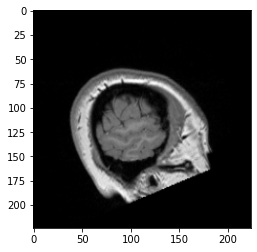

In [53]:
plt.imshow(np.array(img), cmap="gray")

In [41]:
# plt.imshow(np.array(img)[:, :, 0] + np.array(img)[:, :, 1] + np.array(img)[:, :, 2])

In [ ]:
L_prototypes = []
for subid in subids:
    # look at global_analysis.log
    path = os.path.join("/home/mleanie/Downloads/data_local_artefact/", subid, "global_analysis.log")
    prototypes_subid = []
    with open(path, "r") as f:
        f_readlines = f.readlines()
        for i, l in enumerate(f_readlines):
            if "prototype index:" in l:
                prototype_number = l.split(" ")[2]
                prototypes_subid.append(prototype_number)
                L_prototypes.append(prototype_number)
    print(pd.Series(prototypes_subid).value_counts())

In [1]:
# L_prototypes = []
# L_slice_prototype_301 = []
# L_slice_prototype_1788 = []
# L_slice_prototype_368 = []
# L_slice_prototype_948 = []
# L_slice_prototype_1939 = []
# L_slice_prototype_1855 = []
# L_slice_prototype_1997 = []
# L_slice_prototype_1818 = []
# L_slice_prototype_744 = []
# L_slice_prototype_1901 = []
# for subid in subids:
#     # look at global_analysis.log
#     path = os.path.join("/home/mleanie/Downloads/data_local_artefact/", subid, "global_analysis.log")
#     prototypes_subid = []
#     with open(path, "r") as f:
#         f_readlines = f.readlines()
#         for i, l in enumerate(f_readlines):
#             if "prototype index:" in l:
#                 prototype_number = l.split(" ")[2]
#                 prototypes_subid.append(prototype_number)
#                 L_prototypes.append(prototype_number)
#                 if prototype_number == "301\n":
#                     L_slice_prototype_301.append((subid, f_readlines[i-3]))
#                 elif prototype_number == "1788\n":
#                     L_slice_prototype_1788.append((subid, f_readlines[i-3]))
#                 elif prototype_number == "368\n":
#                     L_slice_prototype_368.append((subid, f_readlines[i-3]))
#                 elif prototype_number == "948\n":
#                     L_slice_prototype_948.append((subid, f_readlines[i-3]))
#                 elif prototype_number == "1939\n":
#                     L_slice_prototype_1939.append((subid, f_readlines[i-3]))
#                 elif prototype_number == "1855\n":
#                     L_slice_prototype_1855.append((subid, f_readlines[i-3]))
#                 elif prototype_number == "1997\n":
#                     L_slice_prototype_1997.append((subid, f_readlines[i-3]))
#                 elif prototype_number == "1818\n":
#                     L_slice_prototype_1818.append((subid, f_readlines[i-3]))
#                 elif prototype_number == "744\n":
#                     L_slice_prototype_744.append((subid, f_readlines[i-3]))
#                 elif prototype_number == "1901\n":
#                     L_slice_prototype_1901.append((subid, f_readlines[i-3]))
#     print(pd.Series(prototypes_subid).value_counts())

In [115]:
L_slice_prototype_744

[('SDSU-0050208', "0 (0, 220, 'y', 3.296506179140124e-08)\n"),
 ('SDSU-0050208', "0 (0, 37, 'z', 0.0)\n"),
 ('SDSU-0050208', "0 (0, 36, 'z', 0.0)\n"),
 ('SDSU-0050208', "0 (0, 33, 'z', 0.0)\n"),
 ('SDSU-0050208', "0 (0, 46, 'z', 0.0)\n"),
 ('UM-1-0050290', "0 (0, 7, 'y', 2.0078438059365499e-19)\n"),
 ('KKI-0050801', "0 (0, 18, 'x', 0.00028091503190808)\n"),
 ('KKI-0050801', "0 (0, 178, 'z', 2.822669742386097e-08)\n"),
 ('KKI-0050801', "0 (0, 179, 'z', 0.0001885443489300087)\n"),
 ('KKI-0050801', "0 (0, 10, 'z', 4.734142632772413e-25)\n"),
 ('UCLA-1-0051250', "0 (1, 130, 'x', 1.0)\n"),
 ('UCLA-1-0051250', "0 (0, 149, 'x', 1.5797051980317306e-13)\n"),
 ('Pitt-0050055', "0 (0, 7, 'x', 4.79309786305393e-11)\n"),
 ('Pitt-0050055', "0 (0, 162, 'x', 0.0)\n"),
 ('Pitt-0050055', "0 (0, 11, 'x', 0.0)\n"),
 ('Pitt-0050055', "0 (0, 251, 'y', 2.4335586203960702e-05)\n"),
 ('KKI-0050824', "0 (1, 166, 'x', 0.9999889135360718)\n"),
 ('KKI-0050824', "0 (0, 2, 'z', 6.994080194999697e-07)\n"),
 ('MaxMun-

In [109]:
(pd.Series(L_prototypes).value_counts()/len(L_prototypes)).iloc[:10]

301\n     0.640027
1788\n    0.226653
368\n     0.036023
948\n     0.024774
1939\n    0.014257
1855\n    0.008802
1997\n    0.007789
1818\n    0.007593
744\n     0.004809
1901\n    0.004049
dtype: float64